**Training YOLO v8 model for Nuclei segmentation in H&E-Stained Images** <br>


* Training YOLOv8 model
* Testing the trained model on test dataset
* Extracting morphological measurements from the detected objects
* Plotting results



In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Importing a model with pre-trained weights.**

In [ ]:

model = YOLO('yolov8n-seg.yaml') 
model = YOLO('yolov8n-seg.pt') 

100%|██████████| 6.74M/6.74M [00:00<00:00, 116MB/s]


In [ ]:

import yaml
with open("/content/Nuclei segmentation/yolo_dataset/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:

project = "/content/Nuclei segmentation/yolo_dataset/results"
name = "100_epochs-" 

In [ ]:

results = model.train(data="/content/Nuclei segmentation/yolo_dataset/data.yaml",
                      project=project,
                      name=name,
                      epochs=100,
                      patience=0, 
                      batch=4,
                      imgsz=512)

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Nuclei segmentation/yolo_dataset/data.yaml, epochs=100, time=None, patience=0, batch=4, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/Nuclei segmentation/yolo_dataset/results, name=100_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 86.0MB/s]


AMP: checks passed ✅


train: Scanning /content/Nuclei segmentation/yolo_dataset/train/labels... 532 images, 0 backgrounds, 0 corrupt: 100%|██████████| 532/532 [00:07<00:00, 73.11it/s] 

train: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/train/images/human_bladder_01.png: 96 duplicate labels removed
train: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/train/images/human_bladder_02.png: 12 duplicate labels removed
train: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/train/images/human_bladder_04.png: 516 duplicate labels removed
train: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/train/images/human_bladder_05.png: 116 duplicate labels removed
train: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/train/images/human_bladder_06.png: 72 duplicate labels removed
train: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/train/images/human_bladder_08.png: 81 duplicate labels removed
train: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/train/images/human_bladder_09.png: 124 duplicate labels removed
train: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/train/images/human_bladder_10.png: 96 duplicate labels removed
train: WARNIN

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Nuclei segmentation/yolo_dataset/valid/labels... 169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:02<00:00, 64.25it/s] 

val: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/valid/images/human_bladder_03.png: 100 duplicate labels removed
val: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/valid/images/human_bladder_07.png: 164 duplicate labels removed
val: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/valid/images/human_bladder_11.png: 102 duplicate labels removed
val: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/valid/images/human_cardia_1.png: 87 duplicate labels removed
val: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/valid/images/human_cardia_4.png: 60 duplicate labels removed
val: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/valid/images/human_cardia_5.png: 273 duplicate labels removed
val: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/valid/images/human_cerebellum_12.png: 20 duplicate labels removed
val: WARNING ⚠️ /content/Nuclei segmentation/yolo_dataset/valid/images/human_cerebellum_3.png: 40 duplicate labels removed
val: WARNING ⚠️ /content/Nucl

val: New cache created: /content/Nuclei segmentation/yolo_dataset/valid/labels.cache
Plotting labels to /content/Nuclei segmentation/yolo_dataset/results/100_epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to /content/Nuclei segmentation/yolo_dataset/results/100_epochs-
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.09G      2.029      2.964      2.016      1.283        114        512: 100%|██████████| 133/133 [01:00<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.59it/s]


                   all        169       8519      0.721      0.607      0.675       0.33      0.708      0.583       0.64      0.264

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.29G      1.803      2.622      1.244      1.169        226        512: 100%|██████████| 133/133 [00:59<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]


                   all        169       8519      0.734       0.64      0.716      0.367      0.724       0.63      0.695      0.319

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.06G       1.76      2.587      1.171      1.166        268        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  3.10it/s]


                   all        169       8519      0.701       0.62      0.679      0.354      0.701      0.602      0.662      0.307

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.23G      1.769      2.563      1.151      1.155        252        512: 100%|██████████| 133/133 [00:53<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.04it/s]


                   all        169       8519      0.751      0.659      0.746      0.395      0.737      0.634      0.714      0.333

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.61G      1.723      2.544      1.095      1.144        140        512: 100%|██████████| 133/133 [00:55<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.08it/s]


                   all        169       8519       0.77      0.687      0.765      0.416      0.761      0.667      0.741      0.352

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.17G      1.741      2.517      1.091      1.148        313        512: 100%|██████████| 133/133 [00:53<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.30it/s]

                   all        169       8519       0.75      0.657      0.742       0.38      0.729       0.63      0.704      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.93G      1.689      2.463      1.057      1.118        114        512: 100%|██████████| 133/133 [00:54<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.19it/s]


                   all        169       8519      0.779      0.719      0.785      0.426      0.773      0.699      0.761      0.358

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.2G      1.703      2.447      1.073      1.137        110        512: 100%|██████████| 133/133 [00:52<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.41it/s]

                   all        169       8519      0.774      0.697      0.784      0.416      0.763      0.666      0.744      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.42G      1.681      2.459      1.028      1.128        200        512: 100%|██████████| 133/133 [00:52<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.01it/s]


                   all        169       8519      0.767      0.698      0.773      0.425       0.77      0.676      0.751      0.368

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100         2G      1.662      2.404      1.022      1.121        233        512: 100%|██████████| 133/133 [00:53<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.66it/s]


                   all        169       8519      0.768       0.71      0.787      0.416      0.766      0.684      0.762      0.352

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.02G      1.656      2.428      1.027      1.131        215        512: 100%|██████████| 133/133 [00:52<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]


                   all        169       8519      0.776      0.707      0.776      0.424      0.778      0.691      0.762      0.379

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.22G      1.644      2.409          1      1.126        274        512: 100%|██████████| 133/133 [00:53<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.22it/s]

                   all        169       8519      0.777      0.691      0.779      0.429      0.776      0.666      0.751      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.71G      1.659      2.399     0.9967      1.126        198        512: 100%|██████████| 133/133 [00:52<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.22it/s]

                   all        169       8519      0.805       0.72      0.807       0.44      0.795      0.707      0.787      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.35G      1.636      2.355     0.9701      1.103        538        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.04it/s]


                   all        169       8519      0.804      0.729      0.811      0.449      0.791      0.709      0.786      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.52G       1.63      2.357     0.9693      1.112        293        512: 100%|██████████| 133/133 [00:53<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.41it/s]


                   all        169       8519      0.798      0.717      0.801      0.441      0.784      0.702      0.779      0.374

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.97G       1.65      2.382     0.9867      1.114        504        512: 100%|██████████| 133/133 [00:51<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]


                   all        169       8519      0.785      0.692      0.783      0.423      0.777      0.666      0.757      0.351

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.43G       1.63       2.36     0.9716      1.106        140        512: 100%|██████████| 133/133 [00:51<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.67it/s]


                   all        169       8519      0.799       0.73      0.814      0.448      0.785      0.707      0.785      0.375

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.71G      1.619      2.329     0.9533      1.098        216        512: 100%|██████████| 133/133 [00:53<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.46it/s]


                   all        169       8519      0.805      0.742      0.822      0.456      0.799      0.725      0.801      0.392

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.39G       1.61      2.329     0.9452      1.097        157        512: 100%|██████████| 133/133 [00:51<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.30it/s]


                   all        169       8519      0.801      0.728      0.808       0.45      0.796       0.71      0.788      0.387

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.33G      1.625      2.343     0.9396      1.107        255        512: 100%|██████████| 133/133 [00:53<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.57it/s]

                   all        169       8519      0.805      0.728      0.817      0.459      0.798      0.704       0.79      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.29G      1.616      2.328     0.9241      1.099        289        512: 100%|██████████| 133/133 [00:51<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.99it/s]


                   all        169       8519      0.808      0.729       0.81      0.452       0.81      0.715      0.794      0.392

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.14G      1.618      2.347     0.9434      1.104         86        512: 100%|██████████| 133/133 [00:50<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.69it/s]


                   all        169       8519      0.816      0.721      0.815      0.458      0.818      0.708      0.801      0.409

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.94G      1.613      2.328     0.9362        1.1        279        512: 100%|██████████| 133/133 [00:53<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.77it/s]


                   all        169       8519      0.799      0.727      0.808      0.447        0.8      0.708      0.794      0.392

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.63G      1.607      2.321     0.9306      1.103        492        512: 100%|██████████| 133/133 [00:52<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]


                   all        169       8519      0.792      0.724      0.808      0.453      0.788      0.694       0.78      0.373

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.89G      1.609      2.326     0.9437      1.095        170        512: 100%|██████████| 133/133 [00:52<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.90it/s]


                   all        169       8519      0.811      0.727      0.814      0.457      0.795      0.708      0.788      0.388

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.63G        1.6      2.323     0.9485      1.101        130        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.02it/s]

                   all        169       8519      0.808      0.719      0.806      0.457      0.801      0.699      0.783      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.93G      1.597      2.291     0.9244      1.095        250        512: 100%|██████████| 133/133 [00:53<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.06it/s]


                   all        169       8519      0.811      0.736      0.822      0.459      0.803      0.708      0.796      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.36G      1.566      2.272     0.9131      1.096        211        512: 100%|██████████| 133/133 [00:53<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.33it/s]


                   all        169       8519      0.806       0.74       0.82      0.466       0.79      0.719      0.792      0.402

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.74G       1.58      2.277     0.9116      1.084        210        512: 100%|██████████| 133/133 [00:51<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.92it/s]


                   all        169       8519      0.797      0.719      0.805      0.448      0.788      0.696      0.779      0.387

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.86G      1.582      2.283     0.9014      1.092        187        512: 100%|██████████| 133/133 [00:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.61it/s]

                   all        169       8519      0.811      0.731      0.814      0.456      0.801      0.711      0.792      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.15G      1.628       2.31      0.925      1.098        305        512: 100%|██████████| 133/133 [00:53<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.42it/s]


                   all        169       8519      0.819      0.748      0.834       0.47      0.816      0.732      0.818      0.415

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.63G      1.573       2.24     0.8916      1.088        660        512: 100%|██████████| 133/133 [00:53<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]


                   all        169       8519      0.825      0.737      0.831      0.474      0.815      0.717      0.803      0.397

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.47G       1.59      2.281     0.9081      1.084        140        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.94it/s]


                   all        169       8519      0.811      0.729      0.826      0.465      0.797      0.713      0.802      0.383

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.34G      1.565      2.244      0.882      1.079        537        512: 100%|██████████| 133/133 [00:52<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.04it/s]


                   all        169       8519      0.831      0.742      0.831      0.472      0.816      0.718      0.801      0.387

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.66G      1.558      2.242     0.8899      1.094        178        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.73it/s]


                   all        169       8519      0.822      0.737       0.83       0.47      0.807      0.721      0.803      0.391

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100       4.1G      1.565       2.24     0.8687      1.078        123        512: 100%|██████████| 133/133 [00:54<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]


                   all        169       8519      0.825      0.739      0.832      0.476      0.813      0.725      0.812      0.404

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.64G      1.566      2.255      0.905      1.088        237        512: 100%|██████████| 133/133 [00:53<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]

                   all        169       8519      0.826      0.739      0.827      0.473      0.818      0.724      0.807      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.81G      1.575      2.264     0.9012      1.081        118        512: 100%|██████████| 133/133 [00:52<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.49it/s]


                   all        169       8519      0.827      0.737      0.833      0.471      0.806      0.717      0.806      0.399

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.48G       1.59      2.265     0.9107      1.098         89        512: 100%|██████████| 133/133 [00:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]

                   all        169       8519      0.817      0.739      0.825      0.469      0.808      0.728       0.81      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.92G      1.556      2.228     0.8631      1.088        253        512: 100%|██████████| 133/133 [00:51<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.95it/s]


                   all        169       8519      0.824      0.747      0.829      0.468       0.81      0.732      0.808      0.403

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.9G      1.558      2.243     0.8781      1.081        279        512: 100%|██████████| 133/133 [00:52<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.83it/s]


                   all        169       8519      0.827      0.739      0.836      0.471      0.816      0.719      0.811      0.396

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.74G      1.556      2.233      0.873      1.078        445        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.35it/s]

                   all        169       8519      0.832      0.739      0.824      0.474      0.824      0.723      0.807      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.4G      1.554      2.219      0.877      1.079        250        512: 100%|██████████| 133/133 [00:52<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.33it/s]

                   all        169       8519      0.834      0.737      0.837      0.478      0.823       0.72      0.813      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.76G      1.547      2.222     0.8625      1.074        166        512: 100%|██████████| 133/133 [00:52<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.92it/s]


                   all        169       8519      0.818      0.745      0.829      0.479      0.813      0.726      0.807      0.406

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.46G      1.529        2.2     0.8531       1.07        137        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.17it/s]

                   all        169       8519      0.828      0.745      0.834      0.475      0.816      0.723      0.808      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.53G      1.534      2.195     0.8563      1.076        223        512: 100%|██████████| 133/133 [00:52<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.62it/s]


                   all        169       8519      0.832      0.749      0.842      0.476      0.819      0.732      0.817      0.394

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.79G      1.527      2.199      0.852      1.073        462        512: 100%|██████████| 133/133 [00:53<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]

                   all        169       8519      0.832      0.754      0.844      0.486      0.825      0.745      0.828      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.44G      1.556      2.208     0.8707      1.073        218        512: 100%|██████████| 133/133 [00:51<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.56it/s]


                   all        169       8519      0.833      0.751      0.846      0.486      0.825      0.731      0.823      0.407

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.41G      1.513      2.174     0.8453      1.076        236        512: 100%|██████████| 133/133 [00:51<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]


                   all        169       8519      0.827      0.746      0.833       0.48      0.814       0.72      0.805      0.398

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.11G      1.529      2.184     0.8517      1.075        307        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.52it/s]

                   all        169       8519      0.816      0.739      0.827      0.466      0.811      0.717      0.806      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.59G      1.547      2.224     0.8514      1.077        202        512: 100%|██████████| 133/133 [00:52<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.46it/s]


                   all        169       8519      0.825      0.751       0.84       0.48      0.814      0.732      0.814      0.405

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.2G      1.536       2.19     0.8518      1.066        221        512: 100%|██████████| 133/133 [00:51<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.41it/s]


                   all        169       8519      0.822      0.749      0.827      0.461      0.809      0.725      0.803      0.388

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.49G      1.548      2.199     0.8393      1.064        540        512: 100%|██████████| 133/133 [00:51<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]


                   all        169       8519      0.826      0.758      0.842      0.479      0.825      0.737      0.822      0.408

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.52G      1.544      2.195     0.8477      1.068        254        512: 100%|██████████| 133/133 [00:52<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.23it/s]


                   all        169       8519      0.825      0.751      0.834       0.48      0.821      0.741      0.817      0.413

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.73G      1.525      2.193     0.8356      1.069        160        512: 100%|██████████| 133/133 [00:51<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.47it/s]


                   all        169       8519      0.821      0.761      0.846      0.487      0.815      0.744      0.825      0.417

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.34G      1.529      2.185     0.8351      1.071        182        512: 100%|██████████| 133/133 [00:50<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]

                   all        169       8519      0.832      0.767      0.847       0.49      0.825      0.747      0.825       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.95G      1.513      2.169     0.8382      1.067        235        512: 100%|██████████| 133/133 [00:51<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.64it/s]


                   all        169       8519      0.829      0.764      0.848      0.493      0.821      0.746      0.829       0.42

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.36G      1.527      2.177     0.8431      1.069        109        512: 100%|██████████| 133/133 [00:52<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]


                   all        169       8519      0.831      0.758      0.846      0.489      0.819      0.742      0.823      0.411

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.54G      1.522      2.161     0.8248      1.061         49        512: 100%|██████████| 133/133 [00:52<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.19it/s]

                   all        169       8519       0.83      0.755      0.835      0.479       0.82      0.733       0.81      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.79G      1.544      2.201      0.846      1.076        303        512: 100%|██████████| 133/133 [00:51<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.58it/s]


                   all        169       8519      0.834      0.747      0.837      0.487      0.835      0.733      0.823      0.415

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.09G      1.518      2.173     0.8373      1.061        108        512: 100%|██████████| 133/133 [00:52<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.28it/s]


                   all        169       8519      0.834      0.762      0.848      0.491      0.826       0.74      0.827      0.411

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.19G      1.531      2.179     0.8347      1.066        221        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]


                   all        169       8519      0.839      0.762      0.846      0.489      0.829      0.753      0.832      0.425

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.71G      1.502       2.12     0.8169      1.063        308        512: 100%|██████████| 133/133 [00:51<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]


                   all        169       8519      0.832      0.762       0.85      0.484      0.829      0.745      0.833      0.419

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.91G      1.504      2.158     0.8287      1.061        221        512: 100%|██████████| 133/133 [00:53<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.80it/s]

                   all        169       8519      0.836      0.757      0.852      0.495      0.825      0.742      0.827      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.41G      1.512       2.16     0.8329      1.068        162        512: 100%|██████████| 133/133 [00:51<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.64it/s]


                   all        169       8519      0.846      0.758      0.848      0.492      0.839      0.743      0.826      0.415

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.62G      1.513      2.162     0.8327      1.054        353        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.96it/s]


                   all        169       8519      0.839      0.756      0.847      0.492      0.832      0.743      0.829      0.421

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.08G      1.489      2.142     0.8109      1.052        157        512: 100%|██████████| 133/133 [00:51<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.52it/s]

                   all        169       8519      0.838      0.763      0.846      0.493      0.833      0.754      0.831      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.45G      1.509      2.138     0.8279      1.064        147        512: 100%|██████████| 133/133 [00:51<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.22it/s]

                   all        169       8519      0.833      0.762      0.843      0.488      0.828      0.744      0.826       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.75G      1.503      2.141     0.8108      1.052        239        512: 100%|██████████| 133/133 [00:53<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.61it/s]

                   all        169       8519      0.844      0.755      0.847      0.491       0.83      0.732      0.818      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.44G      1.475      2.096     0.8101       1.05        122        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.46it/s]


                   all        169       8519      0.831      0.765      0.848      0.495      0.824      0.746      0.826      0.417

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.67G      1.484      2.101     0.8061      1.049        226        512: 100%|██████████| 133/133 [00:51<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]


                   all        169       8519      0.849       0.76       0.85      0.494      0.837      0.746      0.828      0.415

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.17G      1.507      2.154     0.8134      1.059         70        512: 100%|██████████| 133/133 [00:53<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.59it/s]


                   all        169       8519      0.838      0.776      0.855      0.495      0.831      0.761      0.837      0.421

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100       3.2G      1.484      2.122     0.8232      1.063        230        512: 100%|██████████| 133/133 [00:50<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.18it/s]

                   all        169       8519      0.832      0.757      0.845      0.487      0.821       0.74      0.821       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.21G      1.502       2.14     0.8164       1.06        145        512: 100%|██████████| 133/133 [00:51<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]


                   all        169       8519      0.838      0.762      0.847      0.492      0.828       0.74      0.824      0.417

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.55G      1.489      2.128     0.8018      1.051        291        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.37it/s]


                   all        169       8519      0.841      0.758      0.847      0.494      0.835      0.742      0.827      0.424

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.76G      1.484      2.113     0.7971      1.057         65        512: 100%|██████████| 133/133 [00:51<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.51it/s]


                   all        169       8519       0.84      0.777      0.854      0.499      0.836       0.76      0.837      0.428

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.3G      1.491      2.112     0.8001      1.053        227        512: 100%|██████████| 133/133 [00:51<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.25it/s]

                   all        169       8519      0.833      0.766      0.853      0.494      0.834      0.741      0.832      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.67G      1.492      2.106     0.8026      1.056        134        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.57it/s]


                   all        169       8519      0.832      0.775      0.857      0.496      0.826      0.753      0.837      0.419

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.88G      1.484      2.099     0.8034      1.054        265        512: 100%|██████████| 133/133 [00:50<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]


                   all        169       8519      0.842      0.761      0.852      0.497      0.839      0.745      0.837      0.431

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.69G      1.467      2.078     0.7818      1.048        176        512: 100%|██████████| 133/133 [00:51<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.97it/s]


                   all        169       8519      0.843      0.768       0.85      0.495      0.834       0.75      0.829       0.42

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.89G      1.477      2.093     0.7913      1.049        184        512: 100%|██████████| 133/133 [00:52<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.18it/s]


                   all        169       8519      0.848      0.762      0.853      0.497      0.837      0.743      0.832      0.417

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.43G      1.486      2.106     0.7863      1.047        203        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]


                   all        169       8519       0.85      0.768      0.855      0.499      0.844      0.749      0.834      0.425

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.71G      1.487      2.092     0.8066      1.056        193        512: 100%|██████████| 133/133 [00:51<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]


                   all        169       8519      0.846      0.766      0.854      0.501      0.839      0.752      0.835      0.429

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.73G      1.492      2.109     0.7914      1.048        372        512: 100%|██████████| 133/133 [00:53<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.65it/s]

                   all        169       8519      0.846      0.773      0.855      0.499      0.832      0.756      0.834      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.01G      1.481      2.079     0.7952      1.049        238        512: 100%|██████████| 133/133 [00:51<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]


                   all        169       8519      0.843      0.776      0.857      0.499      0.835      0.757      0.836      0.427

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.44G      1.472      2.085     0.7816      1.042        364        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.94it/s]


                   all        169       8519      0.853      0.766      0.857        0.5      0.838      0.745       0.83      0.417

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.36G      1.486      2.104     0.7944      1.052        157        512: 100%|██████████| 133/133 [00:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.36it/s]

                   all        169       8519      0.844      0.766      0.852      0.498       0.84      0.746      0.833      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.85G      1.461      2.082      0.791      1.049        236        512: 100%|██████████| 133/133 [00:52<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.29it/s]

                   all        169       8519      0.852      0.767      0.856      0.499      0.838      0.751      0.833       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.65G      1.467      2.091     0.7915      1.051        183        512: 100%|██████████| 133/133 [00:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.49it/s]


                   all        169       8519      0.834      0.777      0.857      0.497      0.826      0.752      0.834      0.416

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.68G       1.48       2.08      0.784      1.044        192        512: 100%|██████████| 133/133 [00:53<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.17it/s]


                   all        169       8519       0.85       0.77       0.86      0.501       0.84      0.756      0.841      0.428
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.02G      1.475        2.1     0.8122      1.061        107        512: 100%|██████████| 133/133 [00:35<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.75it/s]


                   all        169       8519      0.842      0.767      0.848      0.492      0.833      0.752      0.828       0.42

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.22G      1.458      2.071     0.7917      1.065        141        512: 100%|██████████| 133/133 [00:32<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.75it/s]


                   all        169       8519      0.842      0.775      0.859      0.498      0.838      0.749      0.836      0.419

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.52G      1.463      2.074      0.789      1.059         83        512: 100%|██████████| 133/133 [00:32<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  3.14it/s]

                   all        169       8519      0.852      0.768      0.857      0.499      0.846      0.745      0.836      0.422



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.62G      1.443      2.048     0.7784      1.052        271        512: 100%|██████████| 133/133 [00:32<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.91it/s]


                   all        169       8519      0.852       0.77      0.858      0.501      0.843      0.748      0.836      0.423

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.34G      1.453       2.05     0.7855      1.059        166        512: 100%|██████████| 133/133 [00:33<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.27it/s]


                   all        169       8519      0.852      0.771      0.858        0.5      0.836      0.753      0.835      0.421

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.33G      1.433      2.051     0.7723      1.044         92        512: 100%|██████████| 133/133 [00:33<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.58it/s]

                   all        169       8519      0.846       0.77      0.856      0.501      0.838      0.748      0.835      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.48G       1.45      2.054     0.7815       1.05         79        512: 100%|██████████| 133/133 [00:33<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.59it/s]


                   all        169       8519      0.848       0.77      0.858      0.502      0.837      0.748      0.836      0.424

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.37G      1.435      2.036       0.78      1.058         71        512: 100%|██████████| 133/133 [00:34<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.67it/s]


                   all        169       8519      0.847      0.769      0.857      0.502       0.84      0.747      0.837      0.426

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.62G      1.438      2.031     0.7702      1.043        130        512: 100%|██████████| 133/133 [00:33<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.54it/s]

                   all        169       8519      0.851       0.77      0.859      0.502      0.836      0.753      0.837      0.422



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.26G      1.451      2.051     0.7771      1.058         67        512: 100%|██████████| 133/133 [00:33<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.60it/s]


                   all        169       8519      0.852      0.767      0.858      0.504      0.842       0.75      0.837      0.427

100 epochs completed in 1.603 hours.
Optimizer stripped from /content/Nuclei segmentation/yolo_dataset/results/100_epochs-/weights/last.pt, 6.8MB
Optimizer stripped from /content/Nuclei segmentation/yolo_dataset/results/100_epochs-/weights/best.pt, 6.8MB

Validating /content/Nuclei segmentation/yolo_dataset/results/100_epochs-/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.52it/s]


                   all        169       8519      0.852      0.767      0.858      0.504      0.842       0.75      0.837      0.427
Speed: 0.4ms preprocess, 4.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /content/Nuclei segmentation/yolo_dataset/results/100_epochs-


In [ ]:

%load_ext tensorboard

%tensorboard --logdir /content/Nuclei segmentation/yolo_dataset/results/100_epochs-/ --port 6007

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
E0000 00:00:1741446337.166627   31837 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741446337.176670   31837 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}] [--grpc_data_provider PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import] [--inspect]
                   [--version_tb] [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reloa

All training curves, metrics, and other results are stored as images in the 'runs' directory. Let us open a couple of these images.

In [10]:
from IPython.display import Image

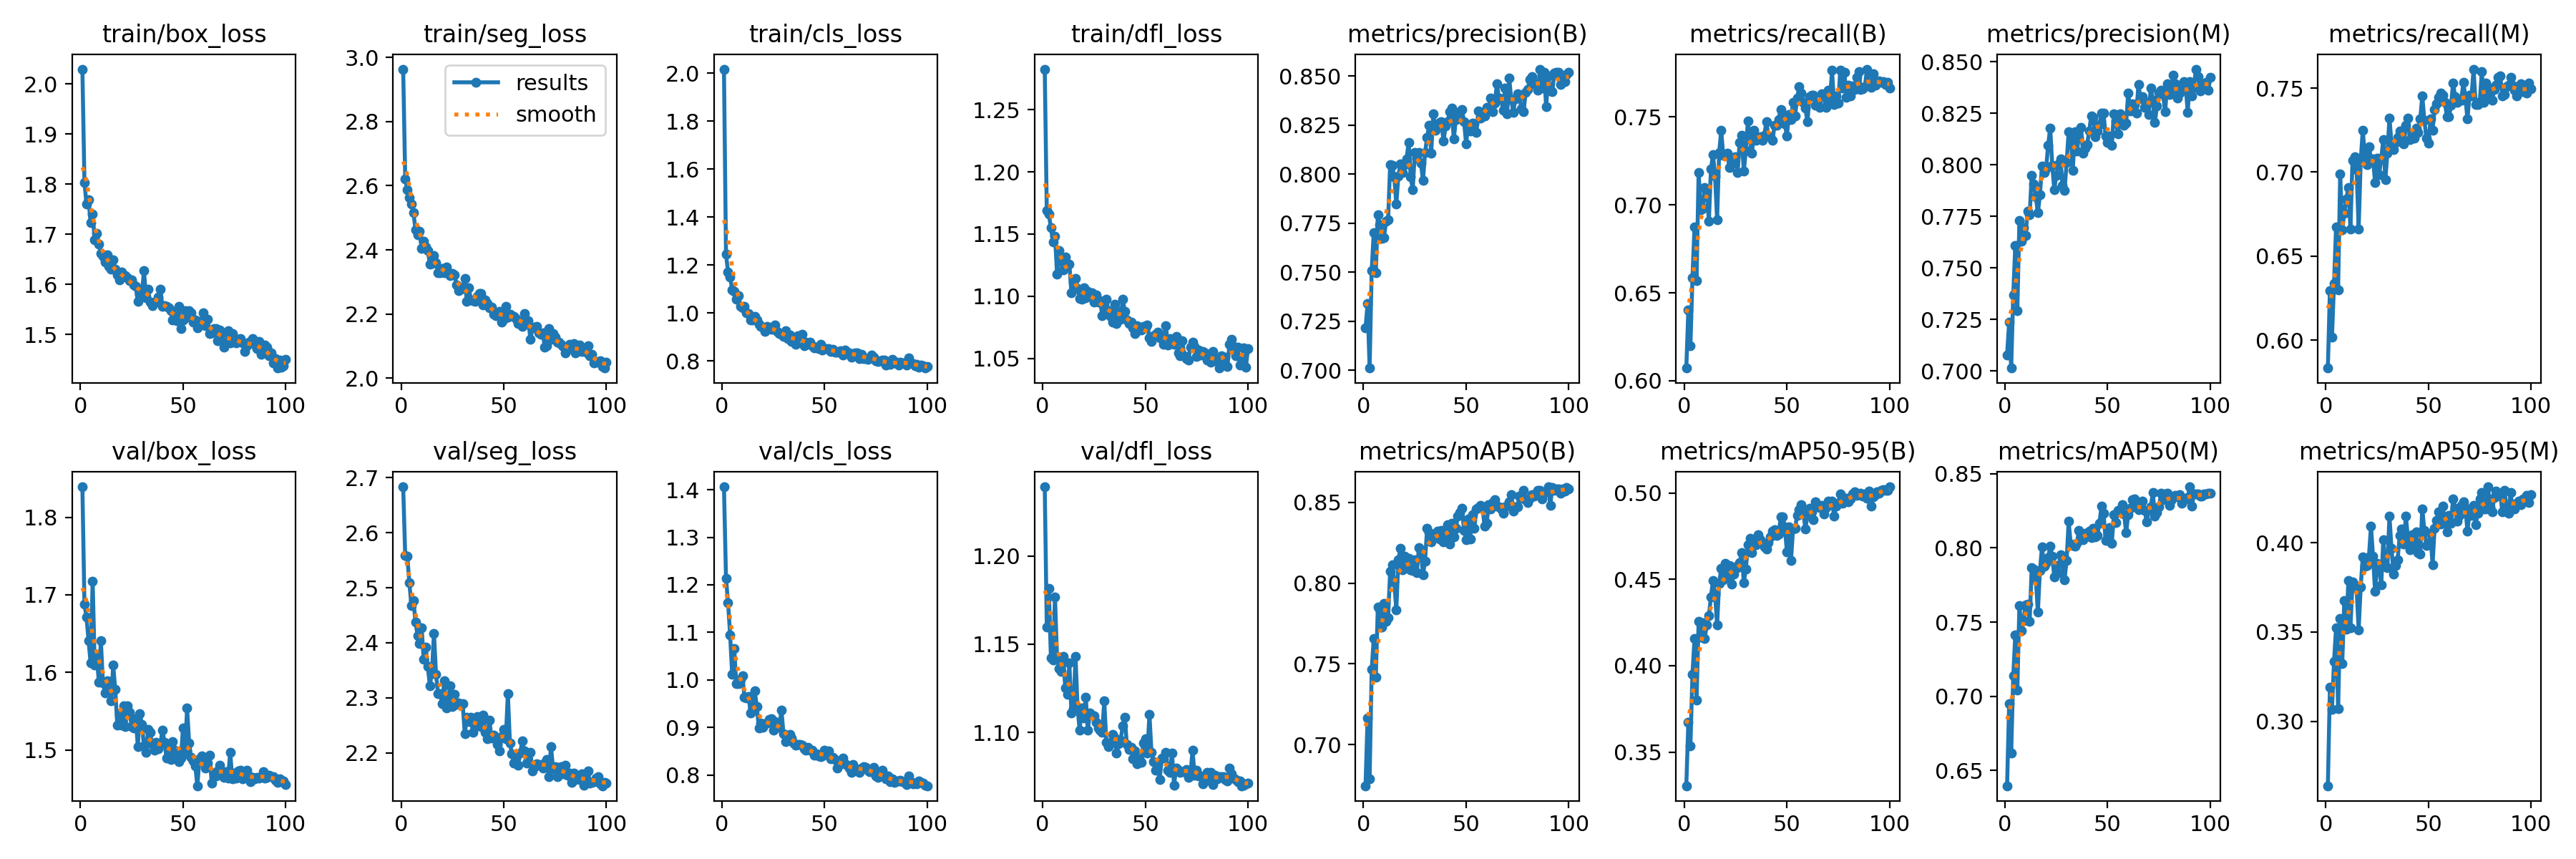

In [14]:
Image("/content/Nuclei segmentation/yolo_dataset/results/100_epochs-/results.png")

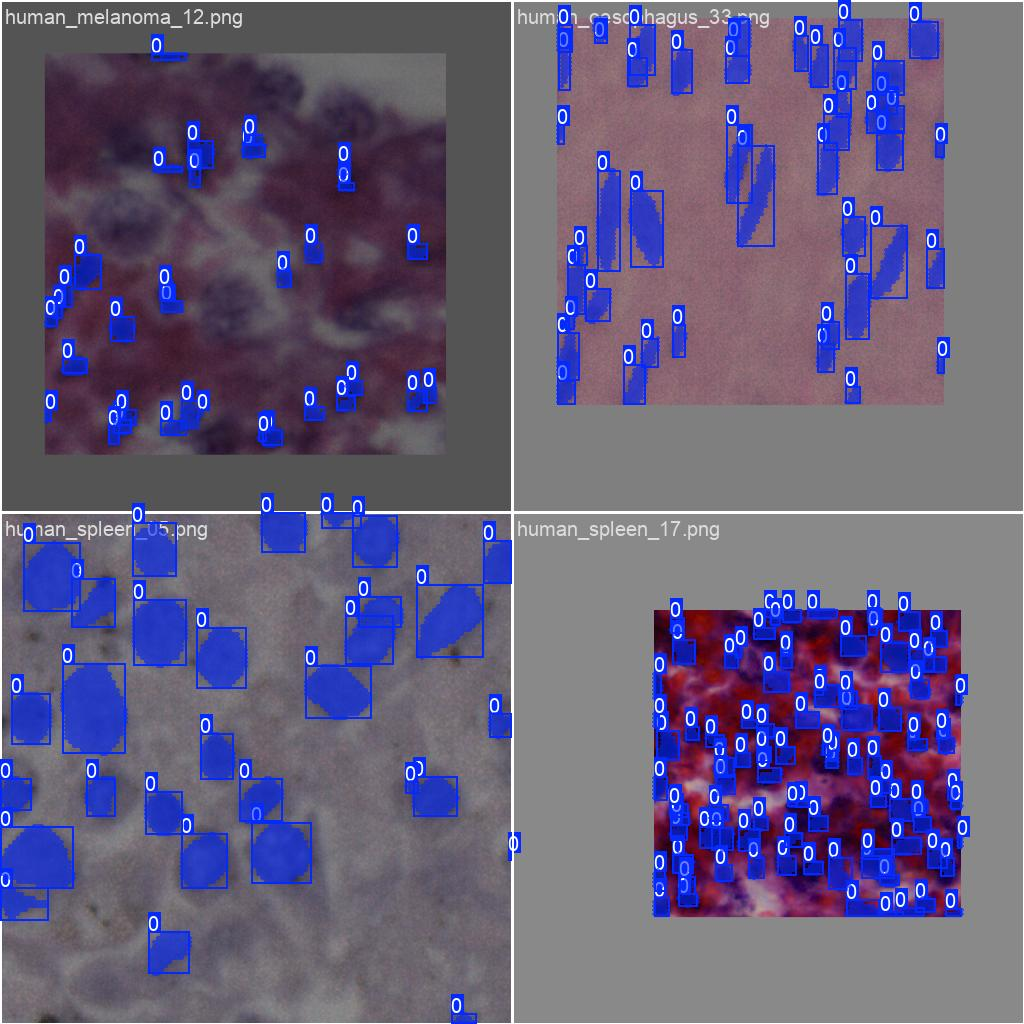

In [15]:
Image(filename='/content/Nuclei segmentation/yolo_dataset/results/100_epochs-/train_batch11970.jpg', width=900)

**Inference**

In [20]:
my_new_model = YOLO('/content/Nuclei segmentation/yolo_dataset/results/100_epochs-/weights/last.pt')

In [21]:
new_image = '/content/Nuclei segmentation/yolo_dataset/test/images/human_liver_22.png'
new_results = my_new_model.predict(new_image, conf=0.5)  #Adjust conf threshold



image 1/1 /content/Nuclei segmentation/yolo_dataset/test/images/human_liver_22.png: 512x512 35 Nucleis, 9.9ms
Speed: 1.4ms preprocess, 9.9ms inference, 19.5ms postprocess per image at shape (1, 3, 512, 512)


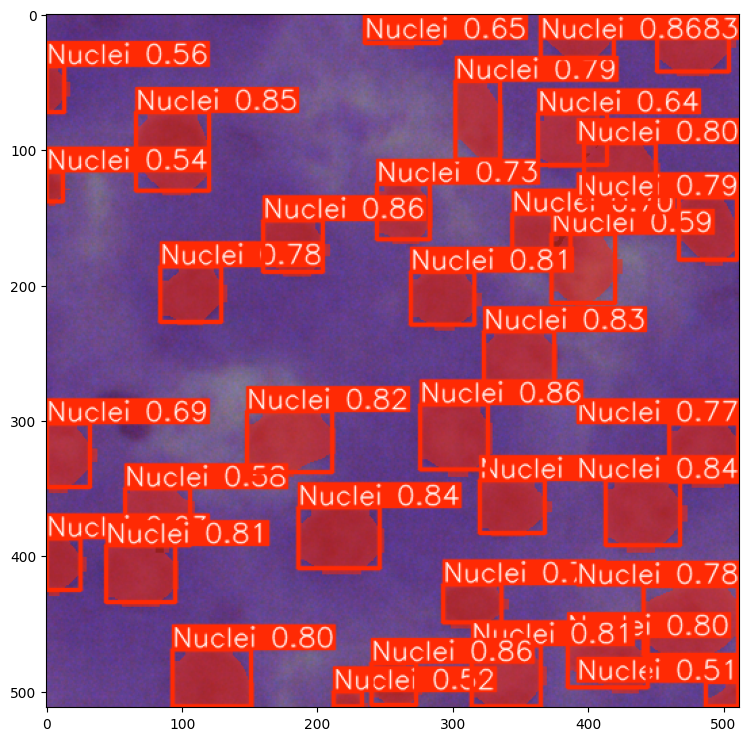

In [22]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(9, 9))
plt.imshow(new_result_array)

# Segmenting and analyzing multiple images

In [ ]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops


input_images_directory = "/content/Nuclei segmentation/yolo_dataset/test/images"


output_csv_path = "/content/Nuclei segmentation/yolo_dataset/test_results/output_objects_yolo.csv"


output_dir_name = os.path.dirname(output_csv_path)

if not os.path.exists(output_dir_name):
    os.makedirs(output_dir_name)

valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']


with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    
    csvwriter.writerow(["File Name", "Class Name", "Object Number", "Area", "Centroid", "BoundingBox"])

  
    for image_filename in os.listdir(input_images_directory):
        
        if not any(image_filename.lower().endswith(ext) for ext in valid_extensions):
            continue

        image_path = os.path.join(input_images_directory, image_filename)
        new_im = cv2.imread(image_path)

       
        new_results = my_new_model.predict(new_im, conf=0.2) 


        
        bounding_boxes = new_results[0].boxes.data.cpu().numpy()  
        class_labels = [0 for _ in range(len(bounding_boxes))]  

        
        for i, bbox in enumerate(bounding_boxes):
            object_number = i + 1
            x1, y1, x2, y2 = bbox[:4]  
            area = (x2 - x1) * (y2 - y1)
            centroid = ((x1 + x2) / 2, (y1 + y2) / 2)
            bounding_box = (x1, y1, x2, y2)

            
            class_name = 'Nuclei'  

            csvwriter.writerow([image_filename, class_name, object_number, area, centroid, bounding_box])

print("Object-level information saved to CSV file.")



0: 512x512 73 Nucleis, 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 80 Nucleis, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 83 Nucleis, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 104 Nucleis, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 5.8ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 94 Nucleis, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 5.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 221 Nucleis, 8.1ms
Speed: 2.2ms preprocess, 8.1ms inference, 9.9ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 55 Nucleis, 14.6ms
Speed: 1.7ms preprocess, 14.6ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 79 Nucleis, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 4.7ms postprocess per image at shape (1,

**Loading our measurements csv file and generating some plots**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Nuclei segmentation/yolo_dataset/test_results/output_objects_yolo.csv')


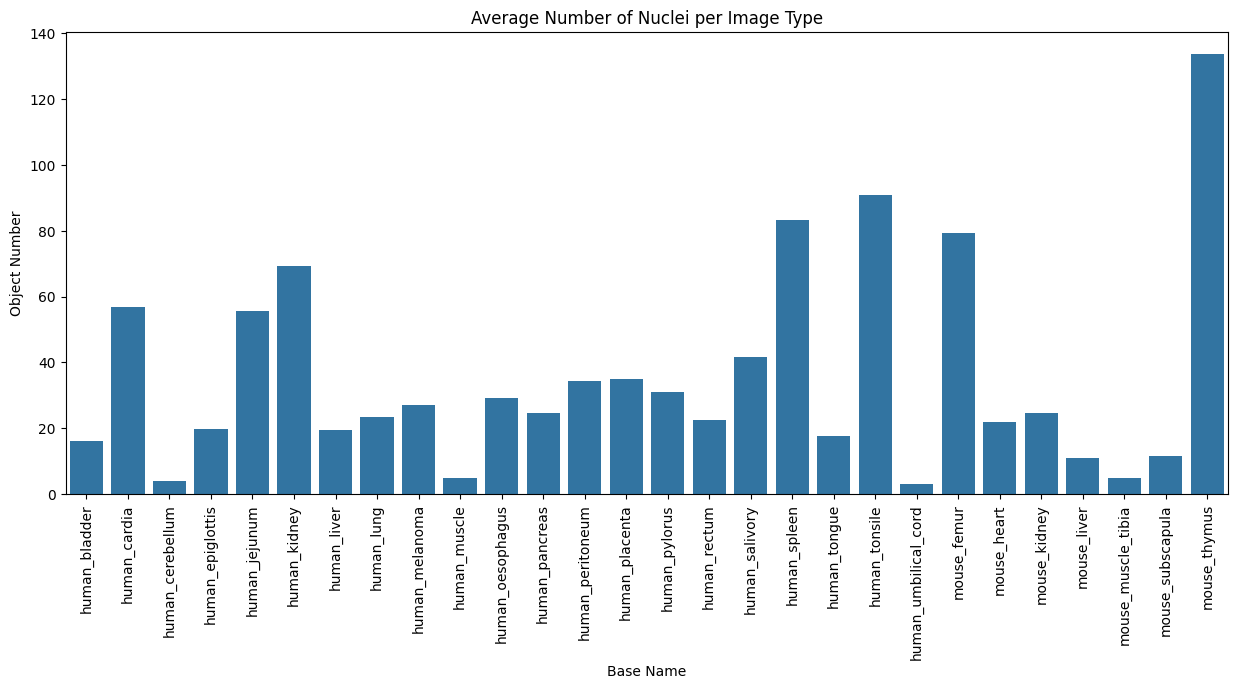

In [ ]:

df['Base Name'] = df['File Name'].str.rsplit('_', n=1).str[0]


avg_nuclei_per_base_name = df.groupby('Base Name')['Object Number'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=avg_nuclei_per_base_name, x='Base Name', y='Object Number')
plt.title('Average Number of Nuclei per Image Type')
plt.xticks(rotation=90)
plt.show()


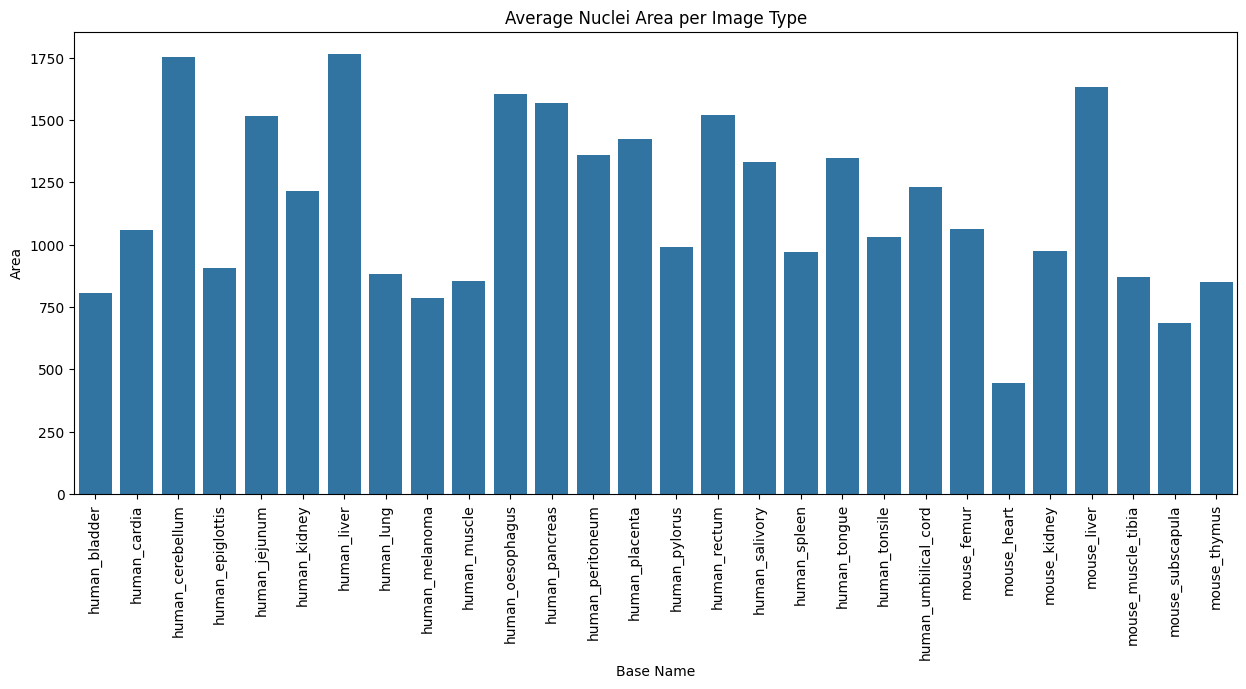

In [ ]:

avg_area_per_base_name = df.groupby('Base Name')['Area'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=avg_area_per_base_name, x='Base Name', y='Area')
plt.title('Average Nuclei Area per Image Type')
plt.xticks(rotation=90)
plt.show()


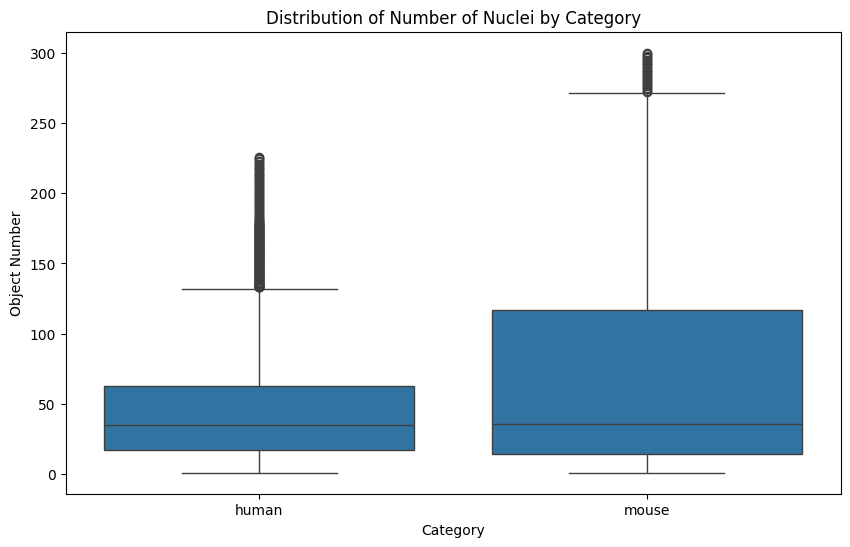

In [ ]:

df['Category'] = df['File Name'].str.split('_').str[0]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Object Number')
plt.title('Distribution of Number of Nuclei by Category')
plt.show()


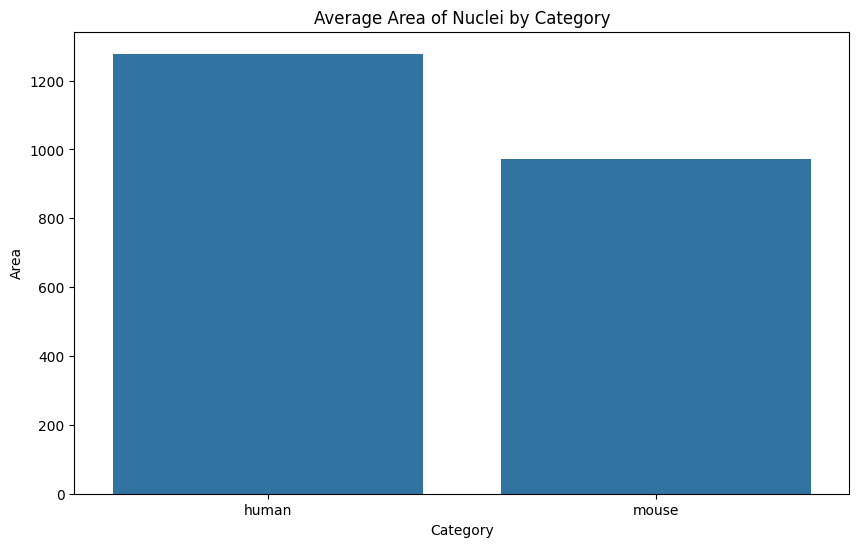

In [ ]:

avg_area_by_category = df.groupby('Category')['Area'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_area_by_category, x='Category', y='Area')
plt.title('Average Area of Nuclei by Category')
plt.show()